Practice 3
1 Задание

In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

Найти и выгрузить многомерные данные с использованием
библиотеки pandas. В отчёте описать найденные данные. 

In [74]:
data = pd.read_csv('./world_population.csv', sep=',')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


2. Вывести информацию о данных при помощи методов .info(), .head(). 

In [75]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [76]:
print(data.head())

   Rank CCA3         Country           Capital Continent  2022 Population  \
0    36  AFG     Afghanistan             Kabul      Asia         41128771   
1   138  ALB         Albania            Tirana    Europe          2842321   
2    34  DZA         Algeria           Algiers    Africa         44903225   
3   213  ASM  American Samoa         Pago Pago   Oceania            44273   
4   203  AND         Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         124

In [77]:
print(data.isna().sum())

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


3. Построить столбчатую диаграмму (.bar) с использованием модуля
graph_objs из библиотеки Plotly со следующими параметрами:
3.1. По оси Х указать дату или название, по оси У указать количественный
показатель.
3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения
показателя (marker=dict(color=признак, coloraxis="coloraxis")).
3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной
линией с толщиной равной 2.
3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с
20 размером текста.
3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для
оси абсцисс развернуть метки так, чтобы они читались под углом,
равным 315.
3.6. Размер текста меток осей сделать равным 14.
3.7. Расположить график во всю ширину рабочей области и присвоить
высоту, равную 700 пикселей.
3.8. Убрать лишние отступы по краям

In [78]:


x = data.loc[data['2022 Population'] > 100000000]['Country']
y = data.loc[data['2022 Population'] > 100000000]['2000 Population']

barchart = px.bar(
    x=x,
    y=y,
    color=x,
    text=y,
    height=700,
    labels={
        'x':'Страна',
        'y':'Население'
    }

)

fig = go.Figure(
    barchart
)

fig.update_traces(
    textfont_size=14,
    textangle=0,
    textposition='outside',
    marker=dict(line=dict(
        color='black',
        width=2
    ))
)

fig.update_layout(
    title_text='Население стран 2000 год', 
    title_x=0.5,
    title_font_size=20,
    margin=dict(
        l=100,
        r=100,
        t=100,
        b=100
    ),
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
    )


fig.show()

Построить круговую диаграмму (go.Pie), использовав данные и стиль
оформления из предыдущего графика. Сделать так, чтобы границы
каждой доли были выделены чёрной линией с толщиной, равной 2

In [79]:
pie_chart = px.pie(
    data.loc[data['2022 Population'] > 100000000],
    values='2022 Population', 
    names='Country',
    height=600,
    labels={
        'x':'Страна',
        'y':'Население'
    }
)

fig = go.Figure(
    pie_chart
)

fig.update_traces(
    textfont_size=14,
    textposition='outside',
    marker=dict(line=dict(
        color='black',
        width=2
    ))
)

fig.update_layout(
    title_text='Население стран больше 100 000 000 млн 2022 год', 
    title_font_size=20,
    title_x=0.5,
    margin=dict(
        l=100,
        r=100,
        t=100,
        b=100
    ),
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
    )

fig.show()

5. Построить линейный график накопленных значений количественного
показателя.
5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет
точек 'white', цвет границ точек 'black', толщина границ точек равна 2.
5.2. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2.
(Можно сделать это при настройке осей с помощью gridwidth=2,
gridcolor='ivory').

In [80]:
russia = data.loc[data['Country'] == 'Russia']
years = np.flip(list(russia)[5:13])
population = np.flip(russia.values.tolist()[0][5:13])


line_chart = px.line(
    x=years,
    y=population,
    markers=True,
    height=600,
    labels={
        'x':'Год',
        'y':'Население'
    }
)

fig = go.Figure(
    line_chart
)

fig.update_traces(
    textfont_size=14,
    line_color='crimson',
    marker_color="white",
    marker=dict(line=dict(
        color='black',
        width=2
    ))
)

fig.update_layout(
    title_text='Динамика населения России', 
    title_font_size=20,
    title_x=0.5,
    margin=dict(
        l=100,
        r=100,
        t=100,
        b=100
    ),
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
    )


fig.update_xaxes(gridwidth=2, gridcolor='ivory')
fig.update_yaxes(gridwidth=2, gridcolor='ivory')

fig.show()


Постараться создать аналогичные графики с использованием
библиотеки matplotlib.

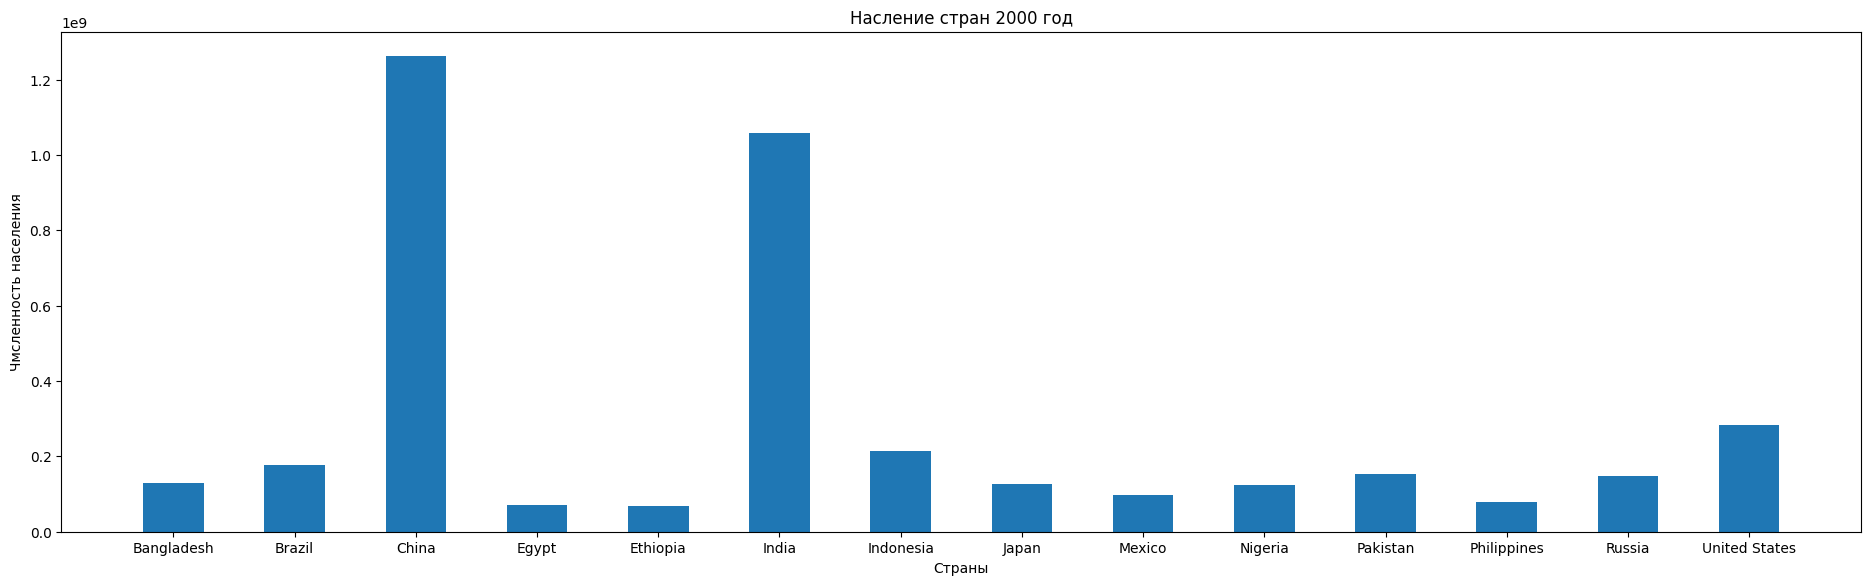

In [81]:
x_plt = data.loc[data['2022 Population'] > 100000000]['Country']
y_plt = data.loc[data['2022 Population'] > 100000000]['2000 Population']

fig = plt.figure(figsize=(18,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(
    x_plt,
    y_plt,
    width = 0.5
    )
ax.set_title('Насление стран 2000 год')
ax.set_ylabel('Чмсленность населения')
plt.xlabel("Страны")
plt.show()



Круговая диаграмма

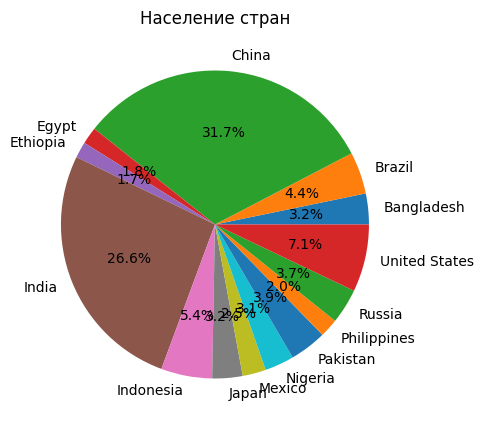

In [82]:
fig, ax = plt.subplots(figsize=(18,5))

ax.pie(
    y_plt, 
    labels=x_plt,
    autopct='%1.1f%%'
    )

ax.set_title('Население стран')
plt.show()


Линейный график

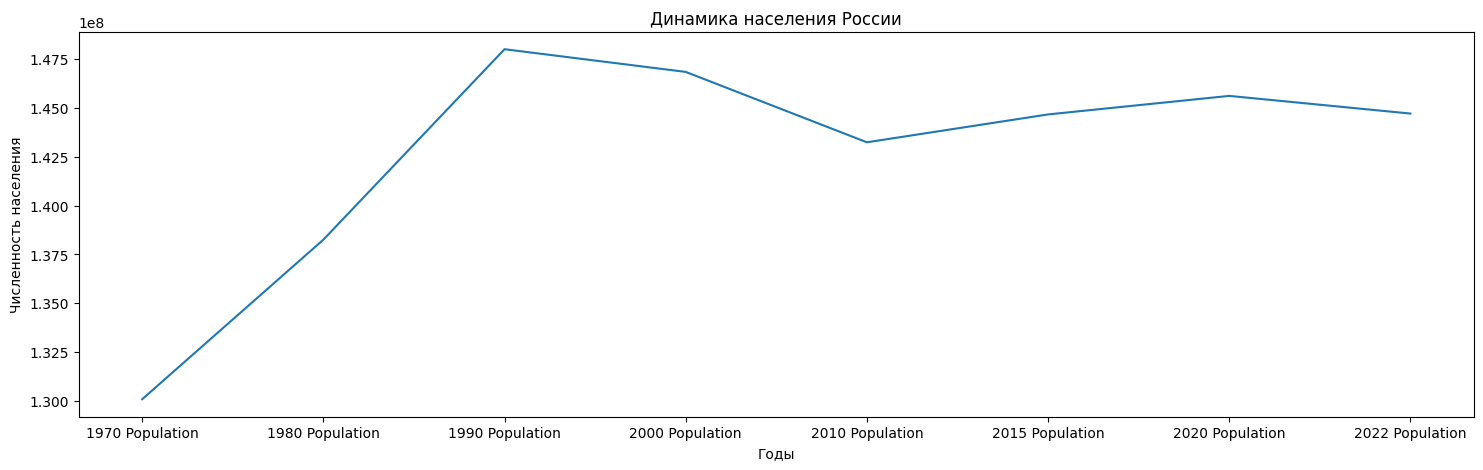

In [83]:
fig, ax = plt.subplots(figsize=(18,5))
ax.set_title('Динамика населения России')
ax.set_ylabel('Численность населения')
plt.xlabel("Годы")
ax.plot(years,population)
plt.show()